In [1]:
# 資料預處理
import numpy as np
np.random.seed(10)

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

import tensorflow as tf
y_train_one_hot = tf.one_hot(y_train, np.max(y_train) + 1)
y_test_one_hot = tf.one_hot(y_test, np.max(y_test) + 1)

In [2]:
# 建立模型
from tensorflow.keras import Sequential
model = Sequential()

from tensorflow.keras import layers
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=36, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [4]:
# 訓練模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_history = model.fit(x=x_train, y=y_train_one_hot, batch_size=300, epochs=10, verbose=2, validation_split=0.2)

Epoch 1/10
160/160 - 22s - loss: 0.5194 - accuracy: 0.8384 - val_loss: 0.0990 - val_accuracy: 0.9703
Epoch 2/10
160/160 - 23s - loss: 0.1366 - accuracy: 0.9590 - val_loss: 0.0612 - val_accuracy: 0.9806
Epoch 3/10
160/160 - 22s - loss: 0.0957 - accuracy: 0.9720 - val_loss: 0.0490 - val_accuracy: 0.9858
Epoch 4/10
160/160 - 22s - loss: 0.0768 - accuracy: 0.9772 - val_loss: 0.0431 - val_accuracy: 0.9872
Epoch 5/10
160/160 - 22s - loss: 0.0668 - accuracy: 0.9798 - val_loss: 0.0393 - val_accuracy: 0.9884
Epoch 6/10
160/160 - 22s - loss: 0.0569 - accuracy: 0.9827 - val_loss: 0.0368 - val_accuracy: 0.9897
Epoch 7/10
160/160 - 25s - loss: 0.0521 - accuracy: 0.9843 - val_loss: 0.0360 - val_accuracy: 0.9899
Epoch 8/10
160/160 - 24s - loss: 0.0477 - accuracy: 0.9852 - val_loss: 0.0339 - val_accuracy: 0.9904
Epoch 9/10
160/160 - 22s - loss: 0.0437 - accuracy: 0.9863 - val_loss: 0.0319 - val_accuracy: 0.9909
Epoch 10/10
160/160 - 23s - loss: 0.0393 - accuracy: 0.9875 - val_loss: 0.0329 - val_accura

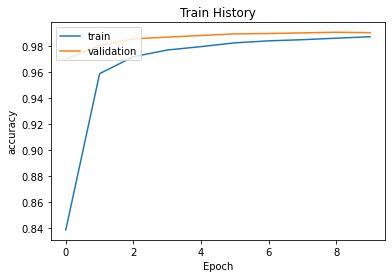

In [7]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
	plt.plot(train_history.history[train])
	plt.plot(train_history.history[validation])
	plt.title('Train History')
	plt.ylabel(train)
	plt.xlabel('Epoch')
	plt.legend(['train', 'validation'], loc='upper left')
	plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')

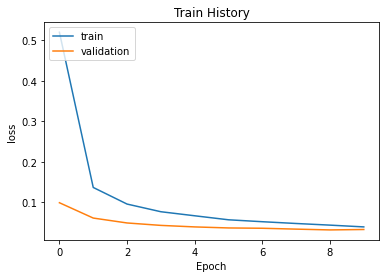

In [8]:
show_train_history(train_history, 'loss', 'val_loss')

In [13]:
# 評估模型準確率
scores = model.evaluate(x_test, y_test_one_hot)
scores[1]

313/313 [==============================] - 2s 6ms/step - loss: 0.0256 - accuracy: 0.9917


0.9916999936103821

In [29]:
# 進行預測
prediction = model.predict_classes(x_test)
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

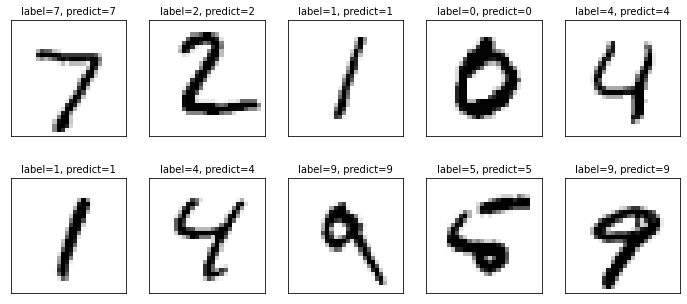

In [30]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25 : num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ", predict=" + str(prediction[i])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

plot_images_labels_prediction(x_test, y_test, prediction, idx=0)

In [31]:
import pandas as pd
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,1,1,1,0
1,0,1134,1,0,0,0,0,0,0,0
2,0,1,1028,0,0,0,0,3,0,0
3,0,0,1,1007,0,2,0,0,0,0
4,0,0,0,0,975,0,0,1,2,4
5,2,0,0,2,0,886,1,1,0,0
6,3,2,0,0,1,4,947,0,1,0
7,0,2,5,2,0,0,0,1018,1,0
8,1,0,3,2,1,4,0,3,957,3
